In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
df = pd.read_csv("heart.csv")

In [45]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [47]:
import seaborn as sns

In [48]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Feature Selection

In [49]:
corr_mat = df.corr()

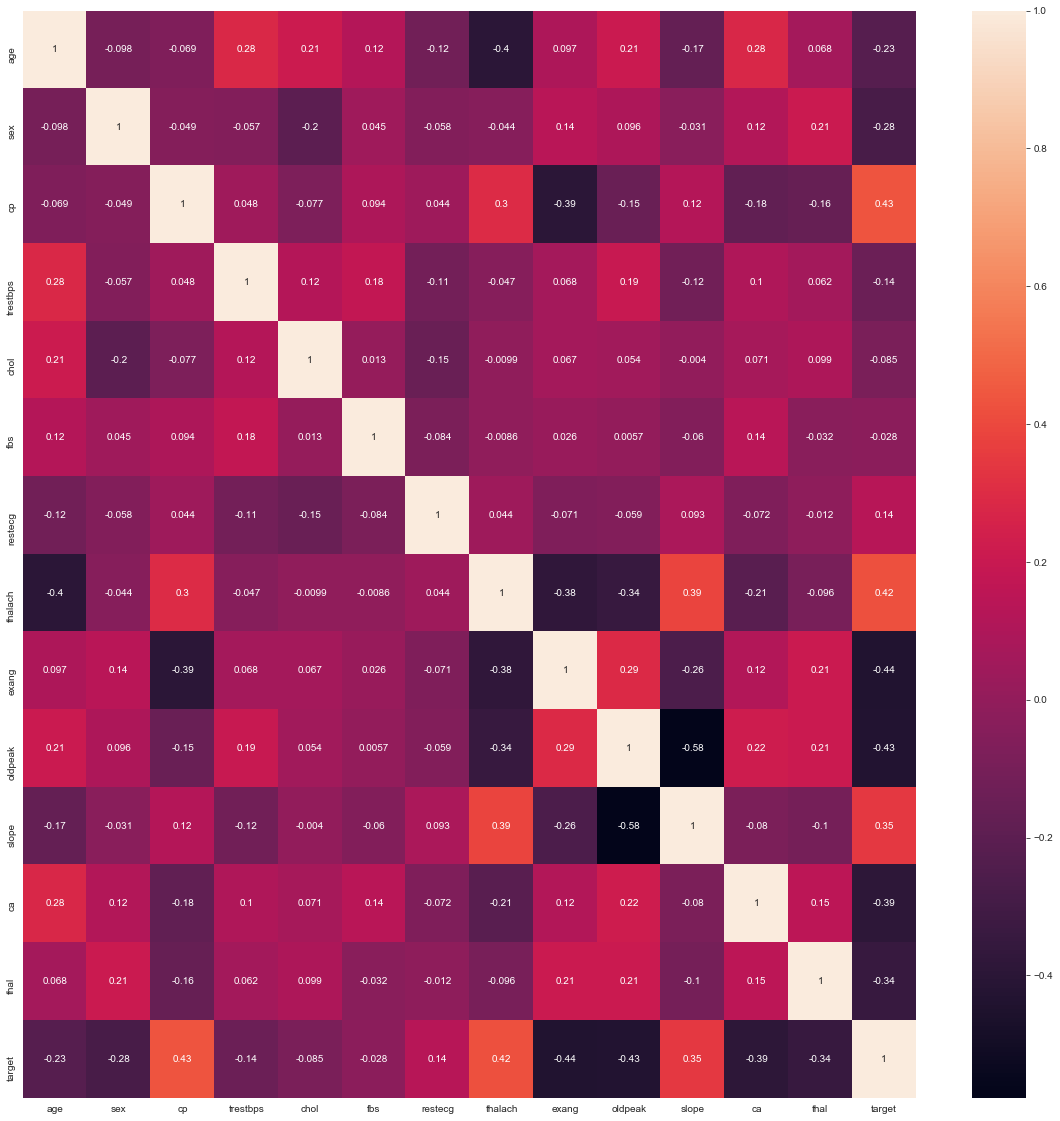

In [50]:
plt.figure(figsize = (20, 20))
sns.heatmap(corr_mat, annot = True)
plt.show()

In [51]:
corr_mat["target"].sort_values(ascending = False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

## Continous Features

In [52]:
cont_features = [features for features in df.columns if df[features].nunique() > 25]
cont_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

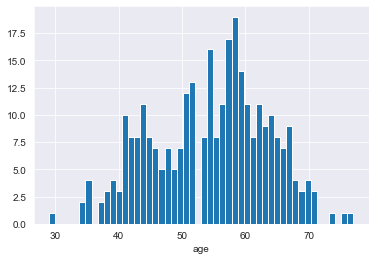

<Figure size 720x432 with 0 Axes>

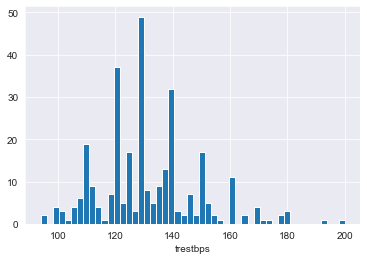

<Figure size 720x432 with 0 Axes>

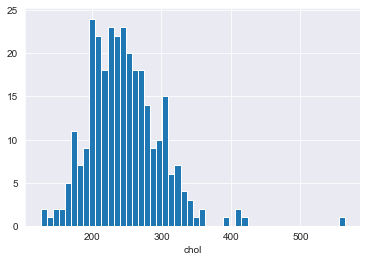

<Figure size 720x432 with 0 Axes>

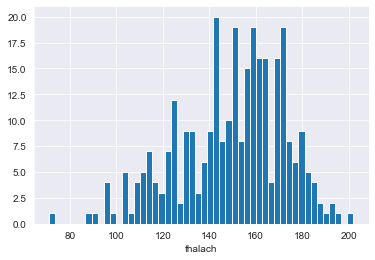

<Figure size 720x432 with 0 Axes>

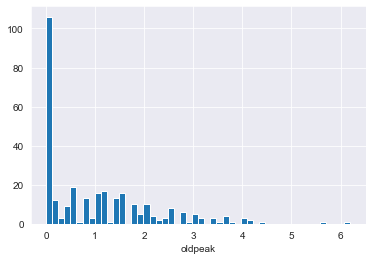

<Figure size 720x432 with 0 Axes>

In [53]:

for x in range(len(cont_features)):
    df[cont_features[x]].hist(bins = 50)
    plt.xlabel(cont_features[x])
    plt.figure(figsize = (10, 6))
    plt.show()


## Let's check if it is a balanced dataset

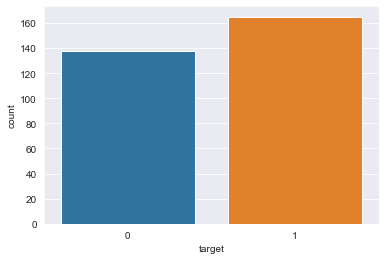

In [54]:
sns.countplot(x = "target", data = df)

## Scaling the continous features

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[cont_features] = sc.fit_transform(df[cont_features])

In [56]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


## Train Test Split

In [57]:
from sklearn.model_selection import train_test_split
y = df["target"]
X = df.drop("target", axis = 1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 101)

## K Nearest Neighbours Classifier

In [62]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier, X_test, y_test, cv = 10)
    knn_scores.append(score.mean())


Text(0, 0.5, 'Score')

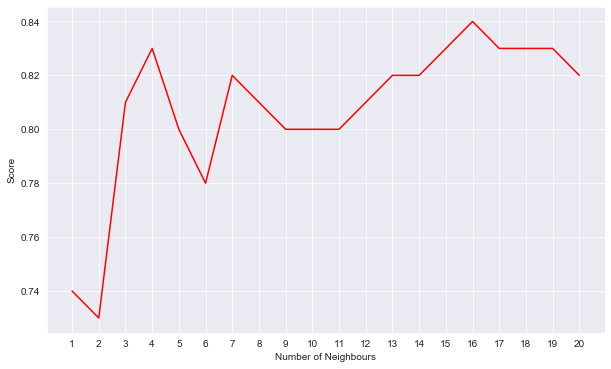

In [64]:
plt.figure(figsize = (10, 6))
plt.plot([k for k in range(1, 21)], knn_scores, color = "red")
plt.xticks([i for i in range(1, 21)])
plt.xlabel("Number of Neighbours")
plt.ylabel("Score")


In [66]:
knn_scores = []
knn_classifier = KNeighborsClassifier(n_neighbors=16)
score = cross_val_score(knn_classifier, X_test, y_test, cv = 10)
knn_scores.append(score.mean())
knn_scores

[0.8400000000000001]

In [68]:
knn_classifier.fit(X_train, y_train)
pred_knn = knn_classifier.predict(X_test)

## Performence metrics

In [69]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(pred_knn, y_test))
print("\n")
print(confusion_matrix(pred_knn, y_test))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        40
           1       0.92      0.80      0.86        60

    accuracy                           0.84       100
   macro avg       0.84      0.85      0.84       100
weighted avg       0.85      0.84      0.84       100



[[36  4]
 [12 48]]


## Random Forest Classifier

In [71]:
rfc = RandomForestClassifier(n_estimators = 10)
score = cross_val_score(rfc, X_test, y_test, cv = 10)
score.mean()


0.78

In [74]:
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)


In [76]:
print(classification_report(pred_rfc, y_test))
print("\n")
print(confusion_matrix(pred_rfc, y_test))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        53
           1       0.73      0.81      0.77        47

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



[[39 14]
 [ 9 38]]
